

# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including 10866 rows and 21 columns that contains cast, user rating, director and revenue 

### Question(s) for Analysis
1-who is the director whose movie has the most profits from 2000 to 2015?

2-Which genres are most popular from 2000 to 2015?

using NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries 

In [62]:
#  import  packages that used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [63]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

loading data, checking for cleanliness, and then trimming and cleaning  dataset for analysis.


In [64]:
# Load the data and print out a few lines.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [65]:
# columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [66]:
# informations about data.count of  non-null and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [67]:
# sum of duplicated rows in the dataset
sum(df.duplicated())

1

In [68]:
# sum of NAN in each colum 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> removing and adding some columns, deleting duplicated rows, and dealing with NAN  

In [69]:
# deleting columns that don't need
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj', 'production_companies', 'cast', 'release_date'], axis=1, inplace=True)


In [70]:
# print out a few lines.
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [71]:
# deleting duplicated rows
df.drop_duplicates(inplace=True)

In [72]:
#showing sum of NAN in each row to deal with it 
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [73]:
# drop NAN 
df.dropna(inplace=True)

In [74]:
# confirm drop NAN  
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [75]:
# create new column called profit 
df['profit'] = df['revenue'] - df['budget']

In [76]:
# print out a few lines.
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1316249360


Text(0.5,1,'Relationship between profit and popularity')

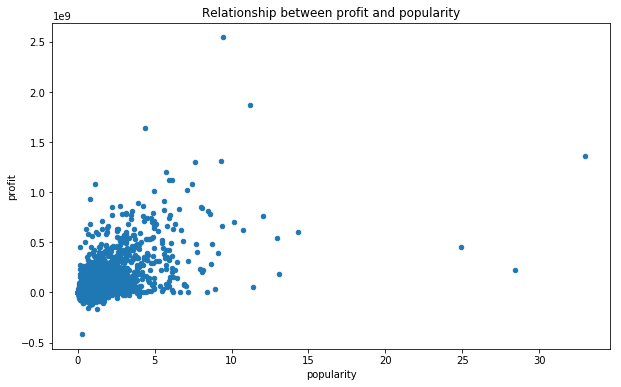

In [77]:
# plot relationship between profit and popularity
df.plot(x='popularity', y='profit', kind='scatter', figsize=(10,6));
plt.title('Relationship between profit and popularity')

#### the more popularity is, the more profit because popularity indicates that  many people know the movie and this increases watcher count 

In [78]:
# number of unique values in each column 
df.nunique()

popularity        10750
budget              556
revenue            4702
original_title    10507
director           5056
runtime             245
genres             2031
vote_count         1289
vote_average         71
release_year         56
profit             5006
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1 (who is the director whose movie has the most profits from 2000 to 2015?)

#### 1.Create a new dataframe, df_2000_2015, that contain only dataset from 2000 to 2015

In [79]:
df_2000_2015 = df.query('release_year >= 2000')

Text(0.5,1,'Counts of movies in each year from 2000 to 2015')

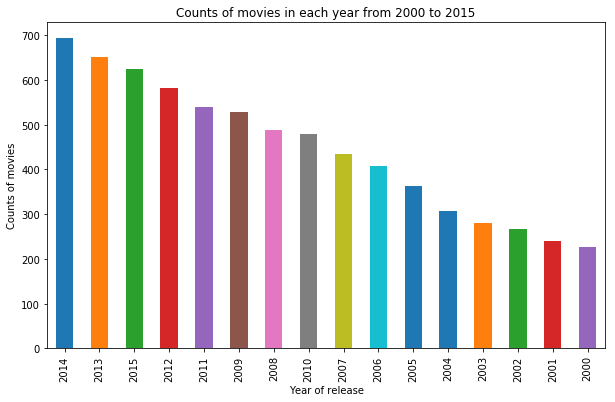

In [80]:
df_2000_2015.release_year.value_counts().plot(kind='bar', figsize=(10,6));
plt.xlabel('Year of release')
plt.ylabel('Counts of movies')
plt.title('Counts of movies in each year from 2000 to 2015')

#### 2014 is the most year that has many movies

Text(0.5,1,'Distribution of profit')

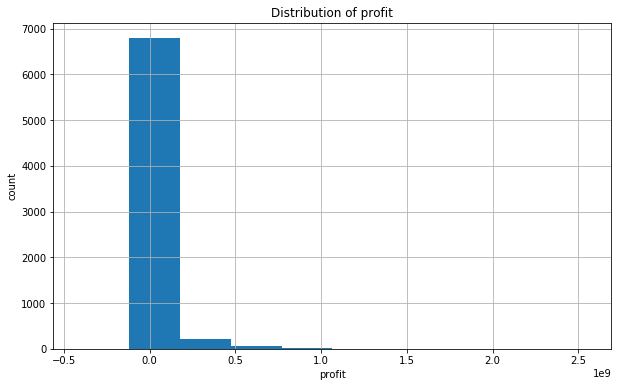

In [81]:
#distribution of profit 
df_2000_2015.profit.hist(figsize=(10,6));
plt.xlabel('profit')
plt.ylabel('count')
plt.title('Distribution of profit')

#### 2. find the most profit

In [82]:
max_profit = df_2000_2015.profit.max()

#### 2. find the director

In [83]:
df_2000_2015.query('profit == 2544505847')['director']

1386    James Cameron
Name: director, dtype: object

#### 3. find the most 10 directors have profits

In [84]:
# create function for sorting data
def df_sort(column):
    return df_2000_2015.sort_values(by = [ column ], ascending = False )

In [85]:
# create new dataframe sorted according to profit called df_sort_pro
df_sort_pro = df_sort('profit')
df_sort_pro.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1316249360
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,8903,7.3,2012,1299557910


In [86]:
#show most 10 director
d = df_sort_pro[['director', 'profit']][:10]
d

,director,profit
1386,James Cameron,2544505847
3,J.J. Abrams,1868178225
0,Colin Trevorrow,1363528810
4,James Wan,1316249360
4361,Joss Whedon,1299557910
3374,David Yates,1202817822
14,Joss Whedon,1125035767
5422,Chris Buck|Jennifer Lee,1124219009
8,Kyle Balda|Pierre Coffin,1082730962
4949,Peter Jackson,1024888979


Text(0.5,1,'Top 10 directors accordind to profit')

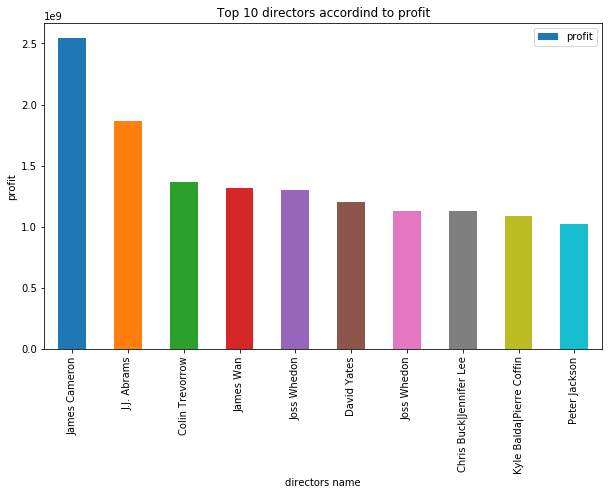

In [87]:
d.plot(x='director', y='profit', kind='bar', figsize=(10,6));
plt.xlabel('directors name')
plt.ylabel('profit')
plt.title('Top 10 directors accordind to profit')

#### This bar chart show top ten directors. This help us to choose the director to deal with.


Text(0.5,1,'Relationship between vote count and profit')

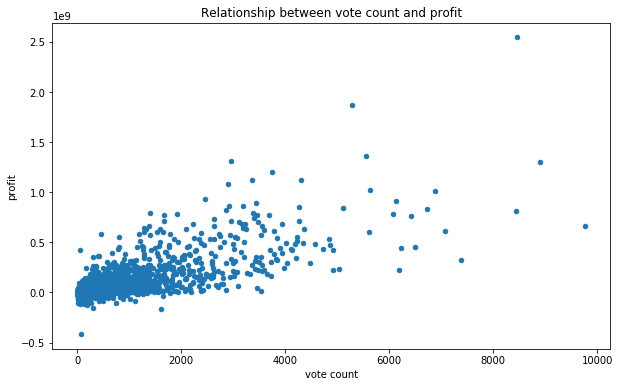

In [88]:
df_sort_pro.plot(x='vote_count', y='profit', kind='scatter', figsize=(10,6));
plt.xlabel('vote count')
plt.ylabel('profit')
plt.title('Relationship between vote count and profit')

#### the more vote count is, the more profit because vote count indicates that people like the movie and this increases watcher count 

### Research Question 2  (Which genres are most popular from 2000 to 2015?)


Text(0,0.5,'count')

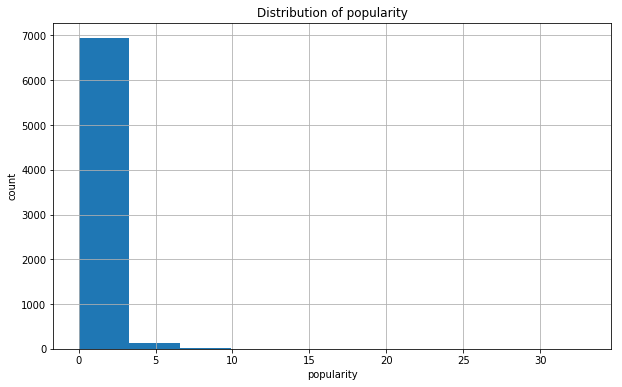

In [89]:
#distribution of popularity 
df_2000_2015.popularity.hist(figsize=(10,6));
plt.title('Distribution of popularity')
plt.xlabel('popularity')
plt.ylabel('count')


#### 1.Create a new dataframe, df_sort_popu, that sorted dataset according to popularity

In [90]:
df_sort_popu = df_sort('popularity') 
df_sort_popu.head(8)

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,6498,8.0,2014,456752480
630,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,Action|Science Fiction|Adventure,5612,7.9,2014,603312399
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
631,12.971027,170000000,714766572,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,3848,7.6,2014,544766572
632,11.422751,20000000,78739897,John Wick,Chad Stahelski|David Leitch,101,Action|Thriller,2712,7.0,2014,58739897
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225


#### 2.clean 'genres' column and take first genre

In [91]:
df1 = df_sort_popu.copy()

In [92]:
df1['genres'] = df.genres.apply(lambda x: x.split('|')[0])


In [93]:
df1.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015,228436354
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Adventure,6498,8.0,2014,456752480
630,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,Action,5612,7.9,2014,603312399
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2480,6.3,2015,185238201


#### 3.show most 10 genres

In [94]:
most_popu = df1[['popularity', 'genres']][:10]
most_popu

,popularity,genres
0,32.985763,Action
1,28.419936,Action
629,24.949134,Adventure
630,14.311205,Action
2,13.112507,Adventure
631,12.971027,Action
632,11.422751,Action
3,11.173104,Action
633,10.739009,Science Fiction
634,10.174599,Adventure


#### 4.plot most 10 genres

Text(0.5,1,'Top 10 genres accordind to popularity')

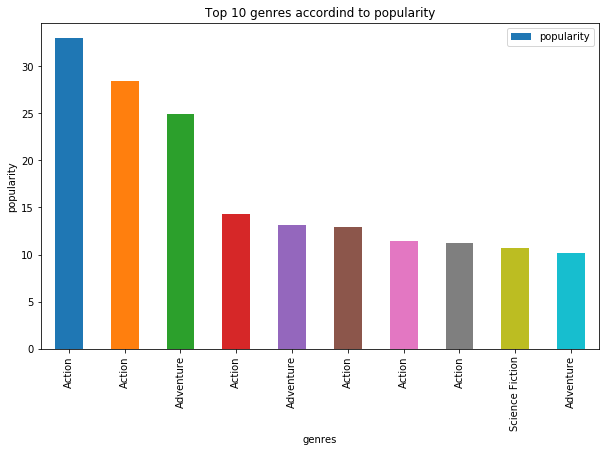

In [95]:
most_popu.plot(x='genres', y='popularity', kind='bar', figsize=(10,6));
plt.xlabel('genres')
plt.ylabel('popularity')
plt.title('Top 10 genres accordind to popularity')

#### This bar chart show top ten genres. This show that action movies are the most popular 


#### 5.get the most popular genre

In [96]:
most_popu['genres'][0]

'Action'

<a id='conclusions'></a>
## Conclusions
first, We find some problems in the data like NAN, duplicated rows, and some columns that we won't use
so we deal with those problems and solve them. 
Then, we start to answer questions step by step with some visualizations

Tere are extracted informations from given dataset: 

1-relationship between popularity and profit is popularity

2-getting top 10 director with profit and the most one is James Cameron

3- getting top 10 popular genres and the most one is Action|Adventure|Science Fiction|Thriller
 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])